# 회귀분석
* 파이썬으로 선형회귀분석
* 단순회귀분석을 진행

## 상관분석 vs 회귀분석
* 상관분석에서 X, Y는 동등한 관계 (둘 다 연속형일때)
* 회귀분석에서 X는 종속변수, Y는 독립변수 (원인과 결과가 있는 분석)
* 회귀분석의 목적 : 인과관계 + 예측

## 회귀분석의 point
* 최소제곱법 : 가장 일반적인 에러를 줄일 수 있는 방법
* 회귀분석의 가정 : 선형성 / 오차항의 등분산성 (잔차분석의 point)
* 추정된 회귀직선의 정도 : 결정계수(R^2), 조정된 결정계수(R^2)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 : 딸과 아버지의 키
* 골턴의 키 데이터 : 딸과 아버지의 관계
* 원자료의 단위는 인치 (inch)
* 따라서 2.54를 곱해서 cm 단위로 사용

In [2]:
data = pd.read_excel("../data/Galtons Height Data_딸.xlsx")

In [3]:
data['daughter'] = data['daughter'] * 2.54
data['father'] = data['father'] * 2.54

In [4]:
data.head()

,father,daughter
0,199.39,175.768
1,199.39,175.260
2,199.39,175.260
3,191.77,166.370
4,191.77,166.370


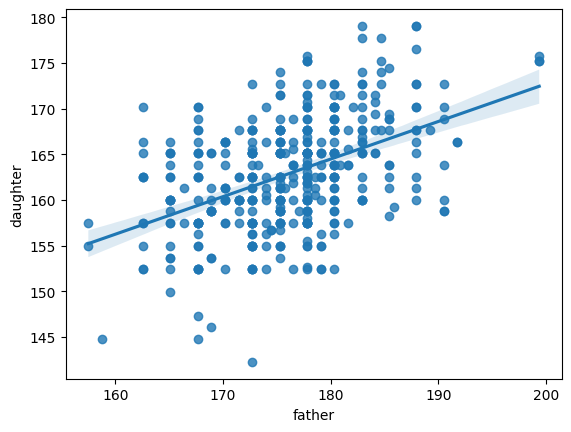

In [10]:
sns.regplot(y = data.daughter, x = data.father)
plt.show()

In [12]:
from statsmodels.formula.api import ols
result = ols('data.daughter ~ data.father', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          data.daughter   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           6.36e-24
Time:                        10:54:30   Log-Likelihood:                -1340.1
No. Observations:                 433   AIC:                             2684.
Df Residuals:                     431   BIC:                             2692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      90.3865      6.764     13.362      

## 잔차분석
* 잔차의 선형성을 분석해보자.
* 실제로 잔차를 계산한 후 분석

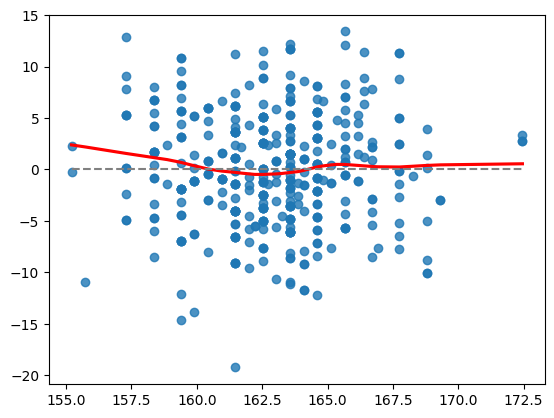

In [21]:
fitted = result.predict(data)
residuals = data['daughter'] - fitted

sns.regplot(x = fitted, y = residuals, lowess = True, line_kws = {'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

## Q-Q plot
* 잔차의 정규성을 확인하는 코드

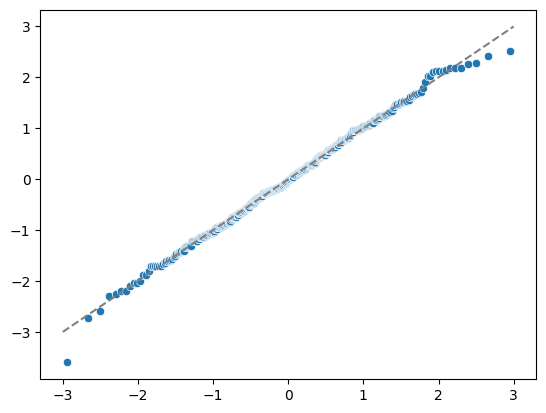

In [25]:
import scipy.stats
sr = scipy.stats.zscore(residuals)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x = x, y = y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

## 잔차의 정규성

In [26]:
# H0 : 잔차가 정규성을 만족한다.
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9970229075900507, pvalue=0.6199871972890164)

## 잔차의 등분산성

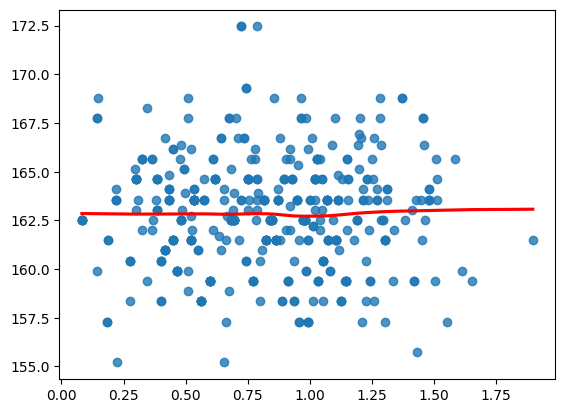

In [37]:
sns.regplot(y = fitted, x = np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})
plt.show()

## 잔차의 독립성
* durbin-watson 값으로 판단

## 극단값

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(result).cooks_distance
cd.sort_values(ascending = False).head()

429    0.038225
421    0.034456
10     0.023619
11     0.023619
393    0.022305
dtype: float64